<a href="https://colab.research.google.com/github/josebermudez310/api-cognitivas/blob/master/apis_cognitivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apis cognitivas
Hoy en día podemos encontrar diversos modelos y apis con servicios cognitivos. Tenemos a Azure, AWS, Google, OpenAI, Deepsek, entre otros.

Entre los modelos de AI que podemos acceder tenemos:
- o1-mini
- o1-large
- gpt-neoxt
- codellama
- whisper
- stable-diffusion
- llama-2

Al igual, tenemos muchos servicos cognitivos como:
- Azure AI Speech: Incluye capacidades como Text-to-Speech y Speech-to-Text.
- Azure AI Face: Servicio de reconocimiento facial para identificación y análisis.
- Azure AI Vision: Procesamiento de imágenes y análisis visual.
- Azure AI Translator: Traducción automática de texto en múltiples idiomas.
- Azure AI Custom Vision: Creación de modelos personalizados de visión artificial.

Pero como podemos acceder a estos servicios y utilizarlos?

La gran mayoría de servicos es necesario tener una subscripción por la cual se paga lo que consume, como la cantidad de tokens para modelos de OpenAI y Deepsek. Pero, hay algunos servicios los cuales tienen una capa gratuita. Por ejemplo con github tenemos acceso a diferentes modelos para realizar pruebas y aproximaciones a esta tecnología. A través, de los code spaces y los github models.
Tambien tenemos en Azure servicios como Azure AI Face y Azure AI Speech donde podemos interactuar con estos con un limite gratuito.

En este presente trabajo nos conectaremos a un modelo gracias a github models y utilizaremos Azure AI Speech para transformar las respuestas que nos de el modelo en audio.

# Referencias
- https://github.com/marketplace?type=models
- https://platform.openai.com/
- https://api-docs.deepseek.com/
- https://learn.microsoft.com/es-es/azure/ai-services/computer-vision/overview-identity
- https://azure.microsoft.com/es-mx/pricing/purchase-options/azure-account/search?icid=free-search&ef_id=_k_CjwKCAjw3MXBBhAzEiwA0vLXQUxmaBaJT1EutV9FSQw9tgOZN0eIZ7_iHOfSUzWHiumbfSswEF-TOhoC9fAQAvD_BwE_k_&OCID=AIDcmm3804ythc_SEM__k_CjwKCAjw3MXBBhAzEiwA0vLXQUxmaBaJT1EutV9FSQw9tgOZN0eIZ7_iHOfSUzWHiumbfSswEF-TOhoC9fAQAvD_BwE_k_&gad_source=1&gad_campaignid=1635073374&gbraid=0AAAAADcJh_tTfgw0mKKxlHxca8H841Le8&gclid=CjwKCAjw3MXBBhAzEiwA0vLXQUxmaBaJT1EutV9FSQw9tgOZN0eIZ7_iHOfSUzWHiumbfSswEF-TOhoC9fAQAvD_BwE
- https://github.com/features/codespaces




## Instalacion de dependencias

In [3]:
# Instalación de dependencias
!pip install openai
!pip install azure-cognitiveservices-speech
!pip install ipython


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


## Conexión con el modelo de github
Para conectarnos con algun modelo de github debemos ejecutar el presente notebook en un codespace de github. Luego una vez en el code space este por defecto tiene la apiKey con la cual podemos conectarnos con algúno de los modelos gratuitos que disponibiliza github. Para este caso utilizaremos gpt-4o.

Ahora bien, para conectarnos con el modelo, utilizaremos la libreria openai. En la cual crearemos un nuevo cliente con la url donde se encuentra los modelos de github y utilizaremos la apiKey cargada en code space. Luego para una prueba preguntaremos cual es el nombre completo de CR7 (Cristiano Ronaldo).

In [4]:
import os
import openai

apiKey = os.environ["GITHUB_TOKEN"]

client = openai.OpenAI(base_url="https://models.inference.ai.azure.com", api_key=apiKey)
modelName = "gpt-4o"

response = client.chat.completions.create(
    model=modelName,
    temperature=0.7,
    n=1,
    messages=[
        {"role": "system", "content": "Eres un gran conocedor de futbol en los últimos 20 años."},
        {"role": "user", "content": "Dime cual es el nombre completo de cr7"},
    ],
    stream=True
)

def showModelResponse(respose):
    print(f"Respuesta del modelo {modelName}: \n")
    for event in respose:
        if event.choices:
            content = event.choices[0].delta.content
            if content:
                print(content, end="", flush=True)
    

showModelResponse(response)

Respuesta del modelo gpt-4o: 

El nombre completo de CR7, más conocido como Cristiano Ronaldo, es **Cristiano Ronaldo dos Santos Aveiro**. Nació el **5 de febrero de 1985** en Funchal, Madeira, Portugal. Es considerado uno de los mejores futbolistas de todos los tiempos. Su apodo "CR7" proviene de las iniciales de su nombre y su icónico número 7, que ha utilizado en la mayoría de los equipos donde ha jugado, como el Manchester United, el Real Madrid, la Juventus y la selección de Portugal.

Excelente, ya nos hemos conectado a este modelo de github models.
Ahora podriamos seguir haciendo preguntas al modelo y seguir explorando las opciones que este tiene. Pero como acercamiento inical ya estamos utilizando un LLM gratuitamente y podemos configurarlo dependiendo de nuestros requerimientos por ejemplo ahora pongamosle un rol de chef y preguntemos una receta de pizza.

In [5]:
response = client.chat.completions.create(
    model=modelName,
    temperature=0.7,
    n=1,
    messages=[
        {"role": "system", "content": "Eres un gran chef especialista en la creacion de pizzas"},
        {"role": "user", "content": "Dame la receta para la mejor pizza hawaiana"},
    ],
    stream= True
)

showModelResponse(response)

Respuesta del modelo gpt-4o: 

¡Por supuesto! Aunque la pizza hawaiana puede ser un tema controvertido entre los amantes de la pizza, es una deliciosa opción para quienes disfrutan de un contraste dulce y salado. Aquí tienes mi receta para la **mejor pizza hawaiana**, con ingredientes frescos y un toque especial para elevarla al siguiente nivel:

---

### **Pizza Hawaiana Suprema**

#### **Ingredientes** (para una pizza de 30 cm o 12 pulgadas):
##### Para la masa (puedes usar masa ya preparada, pero casera siempre es mejor):
- 300 g de harina de trigo (tipo 00 para mejores resultados, o harina común).
- 180 ml de agua tibia.
- 1/2 cucharadita de azúcar.
- 1 cucharadita de sal.
- 7 g de levadura seca activa (1 sobre).
- 2 cucharadas de aceite de oliva extra virgen.

##### Para la salsa:
- 200 g de tomates triturados o salsa de tomate natural.
- 1 diente de ajo, finamente picado.
- 1 cucharada de aceite de oliva.
- 1/2 cucharadita de orégano seco.
- 1/2 cucharadita de albahaca seca.
- Sa

## Conexión con el servicio de Azure AI Speech
Antes de iniciar se debe crear una nueva cuanta en Azure para poder crear los recursos y servicios de Azure AI Speech. Para ello se recomienda ingresar y registrarse en el siguiente enlace: https://azure.microsoft.com/es-mx/pricing/purchase-options/azure-account/search?icid=free-search&ef_id=_k_CjwKCAjw3MXBBhAzEiwA0vLXQUxmaBaJT1EutV9FSQw9tgOZN0eIZ7_iHOfSUzWHiumbfSswEF-TOhoC9fAQAvD_BwE_k_&OCID=AIDcmm3804ythc_SEM__k_CjwKCAjw3MXBBhAzEiwA0vLXQUxmaBaJT1EutV9FSQw9tgOZN0eIZ7_iHOfSUzWHiumbfSswEF-TOhoC9fAQAvD_BwE_k_&gad_source=1&gad_campaignid=1635073374&gbraid=0AAAAADcJh_tTfgw0mKKxlHxca8H841Le8&gclid=CjwKCAjw3MXBBhAzEiwA0vLXQUxmaBaJT1EutV9FSQw9tgOZN0eIZ7_iHOfSUzWHiumbfSswEF-TOhoC9fAQAvD_BwE.

Si ya tiene una cuenta se debe crear un nuevo Speech service (https://learn.microsoft.com/es-es/azure/ai-services/speech-service/overview). En el cual se nos dará una apiKey con la cual podremos interactuar con este servicio.
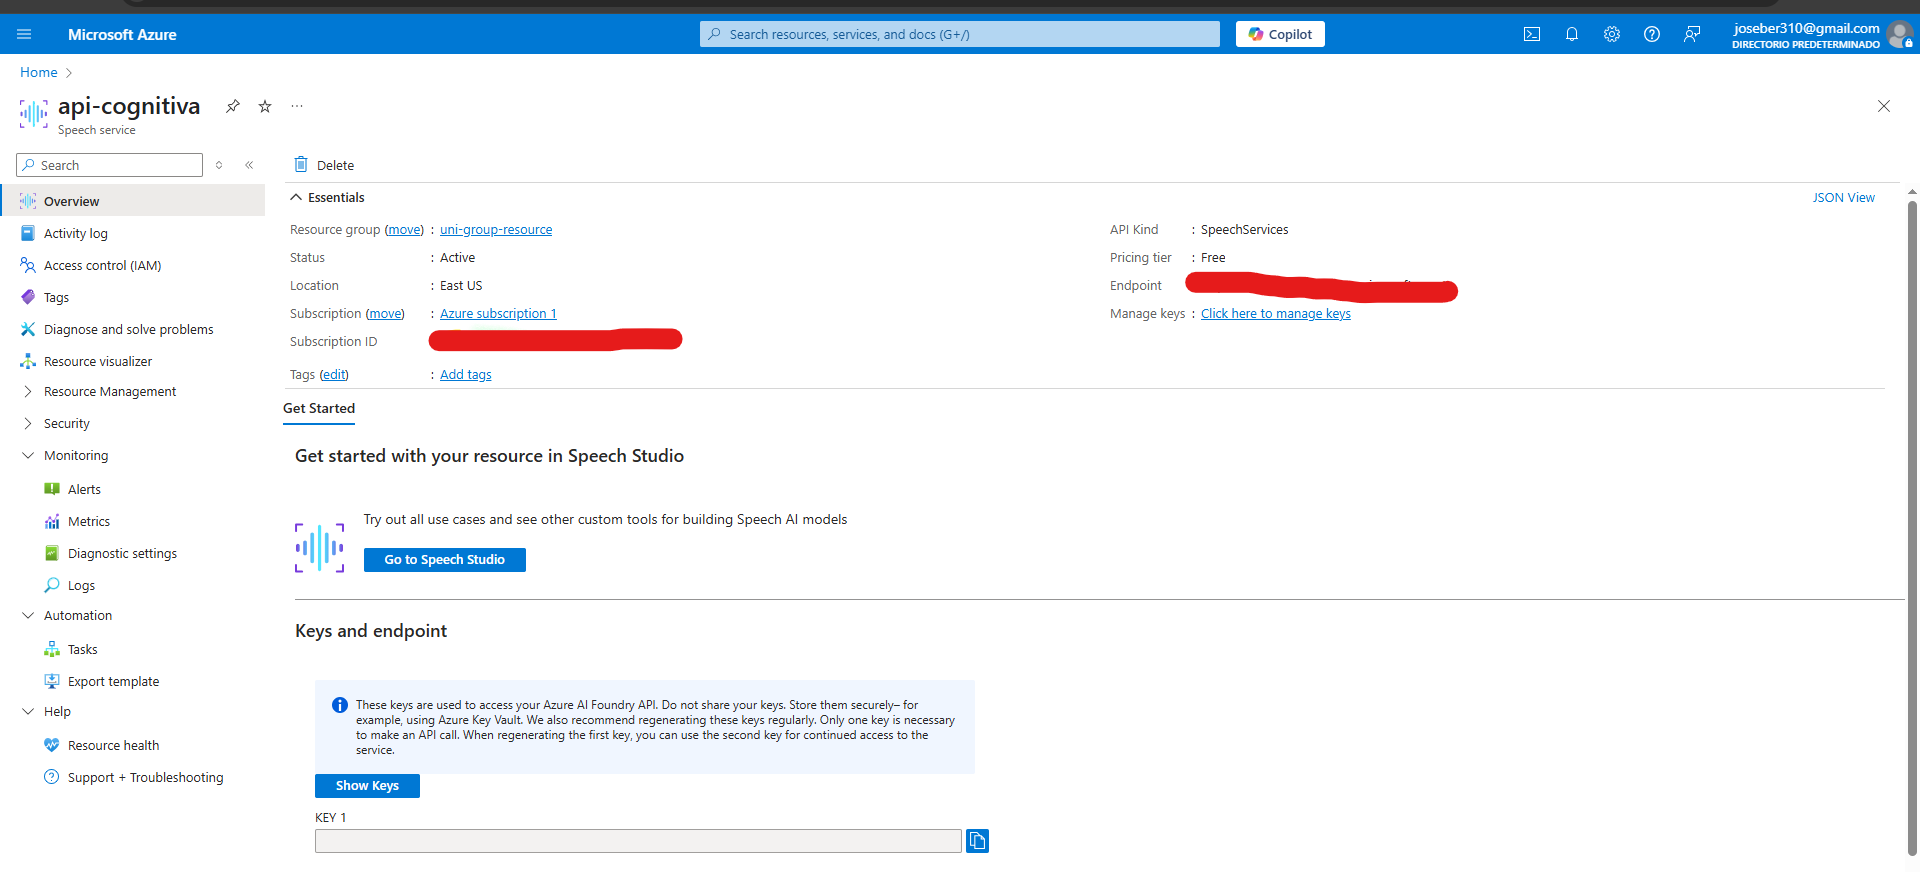

Primero vamos a configurar la region en la que se encuentra nuestro servico creado y nuestra api key

In [6]:
import getpass

print('ingresa la región en la que se encuentra el servicio')
serviceRegion = input()

print('ingresa la apiKey del Speech service de Azure')
speechKey = getpass.getpass()

ingresa la región en la que se encuentra el servicio


 eastus


ingresa la apiKey del Speech service de Azure


 ········


Ya tenemos los valores de la configurarión. Vamos a conectarnos a este servicio y vamos a hacer que se reproduzca un mensaje de ejemplo

In [7]:
import azure.cognitiveservices.speech as speechsdk
from IPython.display import Audio, display

# configuramos el cliente
speechEndpoint = f"https://{serviceRegion}.api.cognitive.microsoft.com"
speechConfig = speechsdk.SpeechConfig(subscription=speechKey, endpoint=speechEndpoint)

# configuramos la voz que queremos
speechConfig.speech_synthesis_voice_name = "es-MX-DaliaNeural"


text = "Hola este es un mensaje generado con Speech service text to speech"

# generamos el audio
def generateAudio(text, fileName):

    # configuramos la salida de audio
    audioConfig = speechsdk.audio.AudioOutputConfig(filename=fileName)
    speechSynthesizer = speechsdk.SpeechSynthesizer(speech_config=speechConfig, audio_config=audioConfig)
    
    result = speechSynthesizer.speak_text_async(text).get()

    # Validamos el resultado
    if result.reason == speechsdk.ResultReason.SynthesizingAudioCompleted:
        
        print("Audio generado correctamente para el texto [{}]".format(text))
        
        display(Audio(fileName, autoplay=True))
    elif result.reason == speechsdk.ResultReason.Canceled:
        # En caso de fallar mostramos el error
        
        cancellation_details = result.cancellation_details
        print("Speech synthesis canceled: {}".format(cancellation_details.reason))
        if cancellation_details.reason == speechsdk.CancellationReason.Error:
            if cancellation_details.error_details:
                print("Error details: {}".format(cancellation_details.error_details))
        print("Did you update the subscription info?")

generateAudio(text, "automatic.wav")


Audio generado correctamente para el texto [Hola este es un mensaje generado con Speech service text to speech]


Ahora hagamos que podamos escribir lo que queremos que nos diga por medio de texto

In [9]:
print('Escribe un mensaje a transformar en audio')
text = input()

generateAudio(text, "fromKeyboard.wav")

Escribe un mensaje a transformar en audio


 Hola papá


Audio generado correctamente para el texto [Hola papá]


## Uniendo los dos servicios

Bien ya nos hemos conectado a un modelo y utilizamos el Speech service de Azure. Ahora vamos a combinar ambos servicios. Le preguntaremos algo a al modelo de github y luego se lo pasaremos al servicio

In [10]:
response = client.chat.completions.create(
    model=modelName,
    temperature=0.7,
    n=1,
    messages=[
        {"role": "system", "content": "Eres un gran conocedor de futbol en los últimos 20 años."},
        {"role": "user", "content": "Dime los 3 mejores jugadores."},
    ]
)

cleanResponse = response.choices[0].message.content.replace("*", "")
cleanResponse = cleanResponse.replace("#","")

generateAudio(cleanResponse, "model.wav")


Audio generado correctamente para el texto [Elegir a los tres mejores jugadores de los últimos 20 años siempre es un tema subjetivo y abierto al debate, pero basándome en desempeño, consistencia, impacto global y éxitos colectivos e individuales, los siguientes tres nombres son ampliamente reconocidos como los mejores:

 1. Lionel Messi  
   - País: Argentina  
   - Posición: Delantero / Mediocampista ofensivo  
   - Razones para estar en el top:  
     - Ganador de múltiples Balones de Oro (8 hasta 2023, récord absoluto).  
     - Récords históricos de goles con el FC Barcelona y la selección argentina.  
     - Campeón de la Copa del Mundo en 2022 con Argentina.  
     - Títulos de clubes: 4 Champions League, 10 Ligas españolas, entre otros.  
     - Considerado por muchos como el jugador más completo de la historia por su capacidad de anotar, asistir y liderar.  

---

 2. Cristiano Ronaldo  
   - País: Portugal  
   - Posición: Delantero  
   - Razones para estar en el top:  
     

## Posibles aplicaciones

Una vez hemos completado estas integraciones vamos algunas posibles aplicaciones en las que se puede utilizar este tipo de tecnologias:

- Agentes Inteligentes: Podemos utilizar los modelos de github y darles el contexto especifico para que responda automaticamente las preguntas de clientes. Haciendo un proceso automatico y a su vez continuando aprendiendo.
- Asistentes inteligentes: Hoy ya vemos esto con las inteligencias artificiales de nuestros celulares, donde podemos hablar con ellas y nos responde con voz. Simulando una conversacion real y ayudandonos con nuestras preguntas diarias.
- Servicios de traduccion: Tambien hoy en dia podemos utilizar los servicios cognitivos para realizar traducciones en tiempo real y lograr comunicarnos con personas de diferentes paises.
- Servicvios de seguridad: Aunque en el presente book no utilizamos los servicios de reconocimiento facial. Conocemos que estos existen y una de sus posibles aplicaciones es en la seguridad de edificios, universidades y control de acceso a diversas areas.
- Analitica de datos: Podemos pasarle a los modelos la informacion de un datawarehouse y con la ayuda del modelo realizar el analisis del mismo. Con esto nos puede sugerir posibles ayudas y sugerencias para las decisiones que debamos tomar.

